# Game of Thrones Twitter Analysis

This is the code for generating the plots for twitter character tweet counts.

In [1]:
import re
import string
import datetime

import numpy as np
import pandas as pd

from nltk.tokenize import TweetTokenizer

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

**Tweets that have either \#GOT \#GameofThrones or \#GOT8**

Scraped between `2019-04-14` and `2019-04-15`.

In [2]:
got = pd.read_csv('data/got_s8e1.csv')

In [3]:
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155385 entries, 0 to 155384
Data columns (total 7 columns):
created_at    155385 non-null object
tweet_id      155385 non-null int64
user          155385 non-null object
location      121785 non-null object
text          155385 non-null object
likes         155385 non-null int64
retweets      155385 non-null int64
dtypes: int64(3), object(4)
memory usage: 8.3+ MB


In [4]:
got['tweet_id'].nunique()

155385

In [5]:
got.head()

,created_at,tweet_id,user,location,text,likes,retweets
0,2019-04-15 02:14:59,1117612252708986882,RyCouldntStopIt,Ohio,@notoreahus I guess 😂 but shit she could be li...,1,1
1,2019-04-15 02:14:59,1117612252658581505,kickasskmo,"New York, NY",This is the episode of uncomfortable conversat...,1,0
2,2019-04-15 02:14:59,1117612252285296641,ThisIsNotZain,"Jersey City, NJ Made",I wanted Lyanna and Jorah beef #GameofThrones,0,0
3,2019-04-15 02:14:59,1117612252251578369,stu__bird,San Diego,“Stay back! He’s got blue eyes!”\n\n“I’ve ALW...,2,0
4,2019-04-15 02:14:59,1117612252029276161,satyam15aug,new delhi,@emiliacIarked Whatever they want\n#GameofThrones,0,0


In [6]:
got['created_at'] = pd.to_datetime(got['created_at'])

In [7]:
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155385 entries, 0 to 155384
Data columns (total 7 columns):
created_at    155385 non-null datetime64[ns]
tweet_id      155385 non-null int64
user          155385 non-null object
location      121785 non-null object
text          155385 non-null object
likes         155385 non-null int64
retweets      155385 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 8.3+ MB


## 1. Timeline data EDA

In [8]:
# Aggregating the tweet count per second
got_count = pd.to_datetime(got['created_at']).value_counts().reset_index(name='tweets').set_index('index')

In [9]:
got_count.head()

,tweets
index,
2019-04-15 01:56:56,95
2019-04-15 01:00:00,91
2019-04-15 01:56:35,87
2019-04-15 01:56:19,86
2019-04-15 01:56:55,85


In [10]:
got_count.index.min(), got_count.index.max()

(Timestamp('2019-04-15 00:45:00'), Timestamp('2019-04-15 02:14:59'))

In [11]:
# Re-aggregate tweet counts per minute and hour

got_by_minute = got_count.resample('T').sum()
got_by_hour = got_count.resample('H').sum()

In [12]:
got_by_minute.head()

,tweets
index,
2019-04-15 00:45:00,698
2019-04-15 00:46:00,662
2019-04-15 00:47:00,704
2019-04-15 00:48:00,682
2019-04-15 00:49:00,830


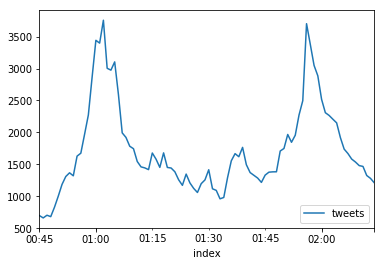

In [13]:
got_by_minute.plot()

In [14]:
got_by_hour.head()

,tweets
index,
2019-04-15 00:00:00,20177
2019-04-15 01:00:00,108542
2019-04-15 02:00:00,26666


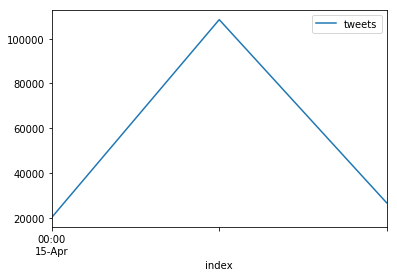

In [15]:
got_by_hour.plot()

## View tweets by minute during the premiere

In [16]:
# show aired from 1AM UTC 
got_show = got_by_minute[(got_by_minute.index >= '2019-04-15 00:45') & (got_by_minute.index < '2019-04-15 02:15')]
got_show.head()

,tweets
index,
2019-04-15 00:45:00,698
2019-04-15 00:46:00,662
2019-04-15 00:47:00,704
2019-04-15 00:48:00,682
2019-04-15 00:49:00,830


In [17]:
got_show.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2019-04-15 00:45:00 to 2019-04-15 02:14:00
Freq: T
Data columns (total 1 columns):
tweets    90 non-null int64
dtypes: int64(1)
memory usage: 1.4 KB


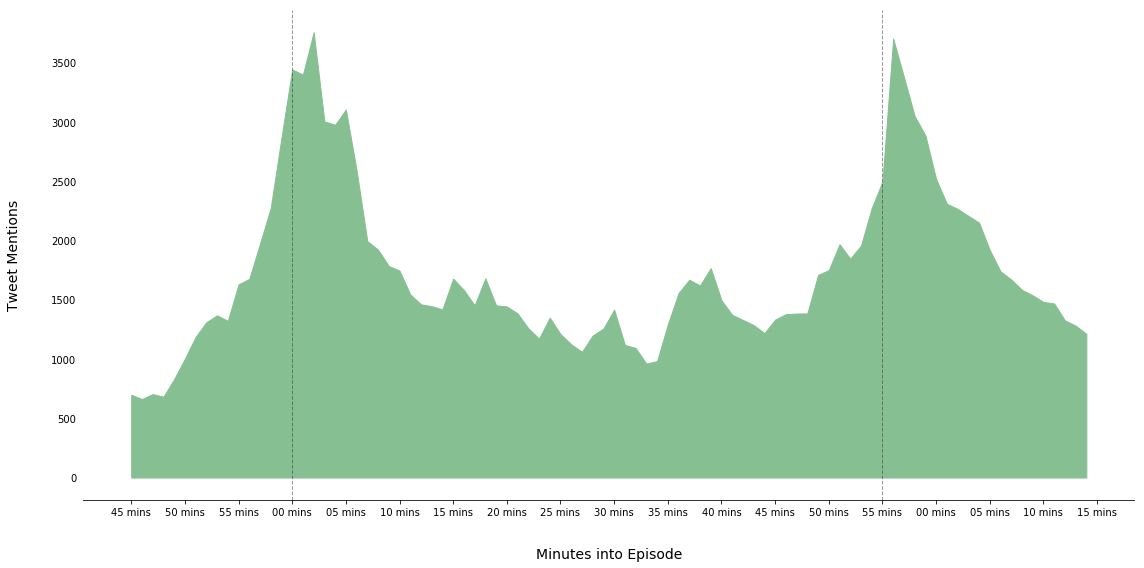

In [18]:
fig, ax = plt.subplots(figsize=(16, 8))
# ax.plot(got_show.index, got_show['tweets'], color='#86bf91')
ax.fill_between(got_show.index, got_show['tweets'], color='#86bf91')

ax.grid(False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom=True, top=False, labelbottom=True, left=False, right=False, labelleft=True)

ax.axvline(x='2019-04-15 01:00', linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)
ax.axvline(x='2019-04-15 01:55', linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)

ax.set_xlabel("Minutes into Episode", labelpad=30, weight='normal', size=14)
ax.set_ylabel("Tweet Mentions", labelpad=30, weight='normal', size=14)

ax.tick_params(axis='x', rotation=0)

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MinuteLocator([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M mins'))

# ax.set_title('GOT Premiere Twitter Buzz', pad=25, weight='normal', size=24)

plt.savefig('images/00_all-tweets.png', dpi=300)
plt.tight_layout()
plt.show()

## 2. Text Analysis for Main Characters

Important characters: #Sansa #Arya #Cersei #Bran #JonSnow #Daenerys #Tyrion #Jamie

### Get tweet counts for each character

In [19]:
# only view tweets 15 mins before and after the show (Episode 1 was actually 54 mins long)

show_text = got[(got.created_at >= '2019-04-15 00:45') & (got.created_at < '2019-04-15 02:15')].reset_index(drop=True)

In [20]:
show_text.head()

,created_at,tweet_id,user,location,text,likes,retweets
0,2019-04-15 02:14:59,1117612252708986882,RyCouldntStopIt,Ohio,@notoreahus I guess 😂 but shit she could be li...,1,1
1,2019-04-15 02:14:59,1117612252658581505,kickasskmo,"New York, NY",This is the episode of uncomfortable conversat...,1,0
2,2019-04-15 02:14:59,1117612252285296641,ThisIsNotZain,"Jersey City, NJ Made",I wanted Lyanna and Jorah beef #GameofThrones,0,0
3,2019-04-15 02:14:59,1117612252251578369,stu__bird,San Diego,“Stay back! He’s got blue eyes!”\n\n“I’ve ALW...,2,0
4,2019-04-15 02:14:59,1117612252029276161,satyam15aug,new delhi,@emiliacIarked Whatever they want\n#GameofThrones,0,0


In [21]:
# Tokenize the tweets and extract the words related to the different main characters

main_characters = ['jon', 'jonsnow', 'john', 'aegon', 'aegontargaryen', 'daenerys', 'daenerystargaryen', 'dany', 'dani', 'khaleesi', 'motherofdragons', 
                   'drogon', 'rhaegal', 'viserion', 'dragons', 'dragon',
                   'tyrion', 'tyrionlannister', 'cersei', 'cerseilannister', 'cersie', 'jamie', 'jaime', 'jaimelannister', 
                   'sansa', 'sansastark', 'arya', 'aryastark', 'bran', 'branstark', 'brandon', 
                   'sam', 'samwell', 'samwelltarly',  'bronn', 'bron', 'brienne', 'sandor', 'sandorclegane', 'hound', 'thehound',
                   'jorah', 'jorahmormont', 'lyanna', 'lyannamormont', 'ladymormont', 'umber', 'lordnedumbr', 'littlelordumber', 
                   'missandei', 'worm', 'greyworm', 'tormund', 'tormundgiantsbane', 'gendry',  'davos', 'serdavos', 'varys', 
                   'theon', 'theongreyjoy', 'yara', 'yaragreyjoy', 'euron', 'eurongreyjoy', 
                   'nightking', 'whitewalker','whitewalkers', 'walkers'] 

def tokenize_tweet_count(tweet):
    # Remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # Remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # Remove the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    # Remove the "'s'" form of the word
    tweet = re.sub(r'\'s', '', tweet)
    
    # Remove non-alphabet characters
    tweet = re.sub(r'[^a-zA-Z ]+', '', tweet)
    
    # Get all of the tokens in a set of tweets
    twt = TweetTokenizer(strip_handles=True, reduce_len=True)
    
    # filter out stop words and punctuation and send to lower case
    tokens = {token.lower()
              for token in twt.tokenize(tweet) 
                  if token.lower() in main_characters
              }
    
    return(' '.join(tokens))

# set comprehension so that each character is counted only once per tweet

In [22]:
tokenize_tweet_count("jon's house don't play! sansa jon sammmy")

'jon sansa'

In [23]:
# create tokenized row
show_text['cleaned_text'] = show_text['text'].apply(tokenize_tweet_count) 

In [24]:
# check to most popular characters overall
dict(show_text['cleaned_text'].str.split(expand=True).stack().value_counts().head(50))

{'jon': 11905,
 'bran': 7870,
 'arya': 5176,
 'sansa': 4823,
 'dragon': 4317,
 'dragons': 3912,
 'sam': 3282,
 'cersei': 3269,
 'daenerys': 2843,
 'dany': 2763,
 'jaime': 2470,
 'jamie': 2464,
 'jonsnow': 1516,
 'theon': 1364,
 'gendry': 1318,
 'tyrion': 1303,
 'euron': 1190,
 'samwell': 820,
 'john': 804,
 'tormund': 742,
 'drogon': 687,
 'lyanna': 629,
 'aegon': 622,
 'bronn': 571,
 'aryastark': 562,
 'hound': 556,
 'yara': 528,
 'umber': 516,
 'daenerystargaryen': 380,
 'walkers': 332,
 'sansastark': 328,
 'branstark': 325,
 'rhaegal': 302,
 'khaleesi': 295,
 'nightking': 279,
 'cerseilannister': 224,
 'jaimelannister': 191,
 'motherofdragons': 191,
 'brienne': 186,
 'missandei': 176,
 'tyrionlannister': 174,
 'varys': 174,
 'bron': 143,
 'samwelltarly': 142,
 'dani': 115,
 'worm': 113,
 'davos': 101,
 'jorah': 99,
 'whitewalkers': 89,
 'aegontargaryen': 85}

In [25]:
show_text.head(10)

,created_at,tweet_id,user,location,text,likes,retweets,cleaned_text
0,2019-04-15 02:14:59,1117612252708986882,RyCouldntStopIt,Ohio,@notoreahus I guess 😂 but shit she could be li...,1,1,
1,2019-04-15 02:14:59,1117612252658581505,kickasskmo,"New York, NY",This is the episode of uncomfortable conversat...,1,0,
2,2019-04-15 02:14:59,1117612252285296641,ThisIsNotZain,"Jersey City, NJ Made",I wanted Lyanna and Jorah beef #GameofThrones,0,0,lyanna jorah
3,2019-04-15 02:14:59,1117612252251578369,stu__bird,San Diego,“Stay back! He’s got blue eyes!”\n\n“I’ve ALW...,2,0,
4,2019-04-15 02:14:59,1117612252029276161,satyam15aug,new delhi,@emiliacIarked Whatever they want\n#GameofThrones,0,0,
5,2019-04-15 02:14:59,1117612251979157505,__lozzaaa,"England, United Kingdom",hello @ #GameofThrones WHERE THE FUCK IS GHOST...,1,0,
6,2019-04-15 02:14:59,1117612251911839745,BhushanShah_,Denial,Bran is the most useless character on the show...,0,0,bran
7,2019-04-15 02:14:59,1117612251773583360,BenTheBiologist,"Ann Arbor, MI",What. A. Premiere. #GameOfThrones,0,0,
8,2019-04-15 02:14:59,1117612251748417536,loooorenanicole,Chicago,@SilvestriCodes So. Good. I need some dragons ...,1,0,daenerys dragons
9,2019-04-15 02:14:59,1117612251677188096,beaunessy,NaN,OMG THATS WHAT HE MEANT WHEN HE SAID HES WAITI...,2195,594,


In [26]:
show_text[show_text.cleaned_text != ''].head(10)

,created_at,tweet_id,user,location,text,likes,retweets,cleaned_text
2,2019-04-15 02:14:59,1117612252285296641,ThisIsNotZain,"Jersey City, NJ Made",I wanted Lyanna and Jorah beef #GameofThrones,0,0,lyanna jorah
6,2019-04-15 02:14:59,1117612251911839745,BhushanShah_,Denial,Bran is the most useless character on the show...,0,0,bran
8,2019-04-15 02:14:59,1117612251748417536,loooorenanicole,Chicago,@SilvestriCodes So. Good. I need some dragons ...,1,0,daenerys dragons
11,2019-04-15 02:14:59,1117612251618455560,septienes,North Carolina,Arya: you don’t know any other rich girls #Gam...,0,0,arya
15,2019-04-15 02:14:59,1117612251207352322,FierceLibLady,"Greensboro, NC",Can Tyrion and Sansa just be friends again plz...,1,0,tyrion sansa
18,2019-04-15 02:14:59,1117612250259427329,JazielQG,México,Now everyone is going to hate #Daenerys but no...,0,0,sansastark dany daenerys
19,2019-04-15 02:14:59,1117612250163027968,caeIumxi,cc @keju_doodlez,Everyone is saying how the episode was kinda u...,5,0,jaime
22,2019-04-15 02:14:59,1117612249613524993,lokismidgard,dragonstone,sansa: did you bend the knee to save the north...,5,0,sansa
24,2019-04-15 02:14:59,1117612249294749696,djw511,Minnesota,Bran Stark put in any setting would be terrify...,0,0,bran
27,2019-04-15 02:14:58,1117612248329883649,alliesonbacon,Bataan | Manila,Jon and Dany using them dragons to literally j...,8,5,dany jon dragons


In [27]:
# filter tweets which contain any character mentions
show_text_main = show_text.loc[show_text.cleaned_text != '', ['created_at', 'text', 'cleaned_text']].reset_index(drop=True)

In [28]:
show_text_main.head(20)

,created_at,text,cleaned_text
0,2019-04-15 02:14:59,I wanted Lyanna and Jorah beef #GameofThrones,lyanna jorah
1,2019-04-15 02:14:59,Bran is the most useless character on the show...,bran
2,2019-04-15 02:14:59,@SilvestriCodes So. Good. I need some dragons ...,daenerys dragons
3,2019-04-15 02:14:59,Arya: you don’t know any other rich girls #Gam...,arya
4,2019-04-15 02:14:59,Can Tyrion and Sansa just be friends again plz...,tyrion sansa
5,2019-04-15 02:14:59,Now everyone is going to hate #Daenerys but no...,sansastark dany daenerys
6,2019-04-15 02:14:59,Everyone is saying how the episode was kinda u...,jaime
7,2019-04-15 02:14:59,sansa: did you bend the knee to save the north...,sansa
8,2019-04-15 02:14:59,Bran Stark put in any setting would be terrify...,bran
9,2019-04-15 02:14:58,Jon and Dany using them dragons to literally j...,dany jon dragons


In [29]:
# create counts for each character of interest (change this per episode as needed)
# this allows text 'jon' & 'jonsnow' to be counted twice on the same tweet, but allowing that for now

show_text_main['jon_count'] = np.where(show_text_main.cleaned_text.str.contains('jon|john|jonsnow'), 1, 0)
show_text_main['aegon_count'] = np.where(show_text_main.cleaned_text.str.contains('aegon|aegontargaryen'), 1, 0)
show_text_main['dany_count'] = np.where(show_text_main.cleaned_text.str.contains('daenerys|daenerystargaryen|dany|dany|khaleesi|motherofdragons'), 1, 0)
show_text_main['dragon_count'] = np.where(show_text_main.cleaned_text.str.contains('drogon|rhaegal|viserion|dragons|dragon'), 1, 0)
show_text_main['cersei_count'] = np.where(show_text_main.cleaned_text.str.contains('cersei|cersie|cerseilannister'), 1, 0)
show_text_main['jaime_count'] = np.where(show_text_main.cleaned_text.str.contains('jamie|jaime|jaimelannister'), 1, 0)
show_text_main['tyrion_count'] = np.where(show_text_main.cleaned_text.str.contains('tyrion|tyrionlannister'), 1, 0)
show_text_main['bran_count'] = np.where(show_text_main.cleaned_text.str.contains('bran|brandon|branstark'), 1, 0)
show_text_main['arya_count'] = np.where(show_text_main.cleaned_text.str.contains('arya|aryastark'), 1, 0)
show_text_main['sansa_count'] = np.where(show_text_main.cleaned_text.str.contains('sansa|sansastark'), 1, 0)
show_text_main['sam_count'] = np.where(show_text_main.cleaned_text.str.contains('sam|samwell|samtarly|samwelltarly'), 1, 0)
show_text_main['gendry_count'] = np.where(show_text_main.cleaned_text.str.contains('gendry'), 1, 0)
show_text_main['hound_count'] = np.where(show_text_main.cleaned_text.str.contains('hound|thehound|sandor|sandorclegane'), 1, 0)
show_text_main['theon_count'] = np.where(show_text_main.cleaned_text.str.contains('theon|theongreyjoy'), 1, 0)
show_text_main['yara_count'] = np.where(show_text_main.cleaned_text.str.contains('yara|yaragreyjoy'), 1, 0)
show_text_main['euron_count'] = np.where(show_text_main.cleaned_text.str.contains('euron|eurongreyjoy'), 1, 0)
show_text_main['tormund_count'] = np.where(show_text_main.cleaned_text.str.contains('tormund|tormundgiantsbane'), 1, 0)
show_text_main['umber_count'] = np.where(show_text_main.cleaned_text.str.contains('umber|nedumber|lordnedumber|littlelordumber'), 1, 0)
show_text_main['bronn_count'] = np.where(show_text_main.cleaned_text.str.contains('bronn|bron'), 1, 0)
show_text_main['whitewalker_count'] = np.where(show_text_main.cleaned_text.str.contains('nightking|whitewalker|whitewalkers|walkers'), 1, 0)

In [30]:
show_text_main['jon_count'].sum(), show_text_main['dany_count'].sum(), show_text_main['bran_count'].sum(), show_text_main['jaime_count'].sum(), show_text_main['tyrion_count'].sum()

(14061, 6336, 8218, 5097, 1470)

In [31]:
# re-aggregate by tweet count per minute
show_text_main_minute = show_text_main.set_index('created_at').resample('T').sum()

In [32]:
show_text_main_minute.head()

,jon_count,aegon_count,dany_count,dragon_count,cersei_count,jaime_count,tyrion_count,bran_count,arya_count,sansa_count,sam_count,gendry_count,hound_count,theon_count,yara_count,euron_count,tormund_count,umber_count,bronn_count,whitewalker_count
created_at,,,,,,,,,,,,,,,,,,,,
2019-04-15 00:45:00,30,1,25,20,7,6,7,3,16,12,5,3,1,1,0,4,0,0,1,12
2019-04-15 00:46:00,24,1,20,6,8,3,11,12,15,12,1,2,1,2,0,0,1,0,0,5
2019-04-15 00:47:00,25,1,18,14,5,3,10,4,12,5,3,1,2,3,0,3,2,0,0,10
2019-04-15 00:48:00,31,2,17,18,10,6,9,7,14,8,4,2,4,2,0,0,6,0,1,9
2019-04-15 00:49:00,20,0,20,32,3,2,4,5,4,5,5,0,4,0,1,0,1,0,1,11


## Plots

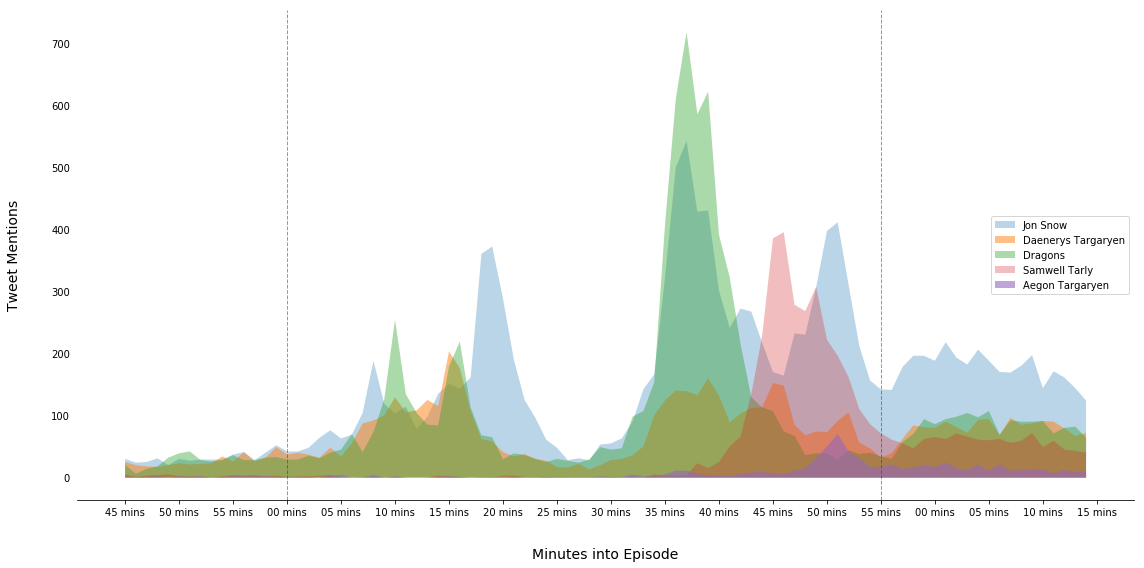

In [33]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.fill_between(show_text_main_minute.index, show_text_main_minute['jon_count'], alpha=0.3, label='Jon Snow')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['dany_count'], alpha=0.5, label='Daenerys Targaryen')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['dragon_count'], alpha=0.4, label='Dragons')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['sam_count'], alpha=0.3, label='Samwell Tarly')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['aegon_count'], alpha=0.6, label='Aegon Targaryen')


ax.grid(False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom=True, top=False, labelbottom=True, left=False, right=False, labelleft=True)

ax.axvline(x='2019-04-15 01:00', linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)
ax.axvline(x='2019-04-15 01:55', linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)

ax.set_xlabel("Minutes into Episode", labelpad=30, weight='normal', size=14)
ax.set_ylabel("Tweet Mentions", labelpad=30, weight='normal', size=14)

ax.tick_params(axis='x', rotation=0)

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MinuteLocator([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M mins'))

ax.legend(loc='center right')
# ax.set_title('GOT Character Twitter Buzz', pad=25, weight='normal', size=24)

plt.savefig('images/01_jon.png', dpi=300)
plt.tight_layout()
plt.show()

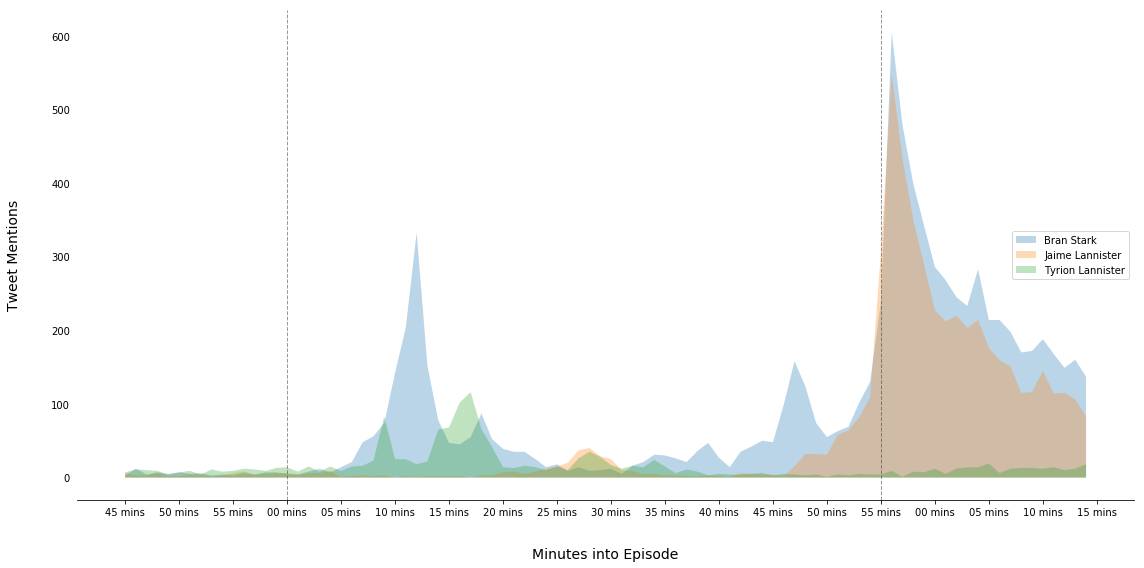

In [34]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.fill_between(show_text_main_minute.index, show_text_main_minute['bran_count'], alpha=0.3, label='Bran Stark')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['jaime_count'], alpha=0.3, label='Jaime Lannister')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['tyrion_count'], alpha=0.3, label='Tyrion Lannister')

ax.grid(False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom=True, top=False, labelbottom=True, left=False, right=False, labelleft=True)

ax.axvline(x='2019-04-15 01:00', linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)
ax.axvline(x='2019-04-15 01:55', linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)

ax.set_xlabel("Minutes into Episode", labelpad=30, weight='normal', size=14)
ax.set_ylabel("Tweet Mentions", labelpad=30, weight='normal', size=14)

ax.tick_params(axis='x', rotation=0)

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MinuteLocator([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M mins'))

ax.legend(loc='center right')
# ax.set_title('GOT Character Twitter Buzz', pad=25, weight='normal', size=24)

plt.savefig('images/02_bran.png', dpi=300)
plt.tight_layout()
plt.show()

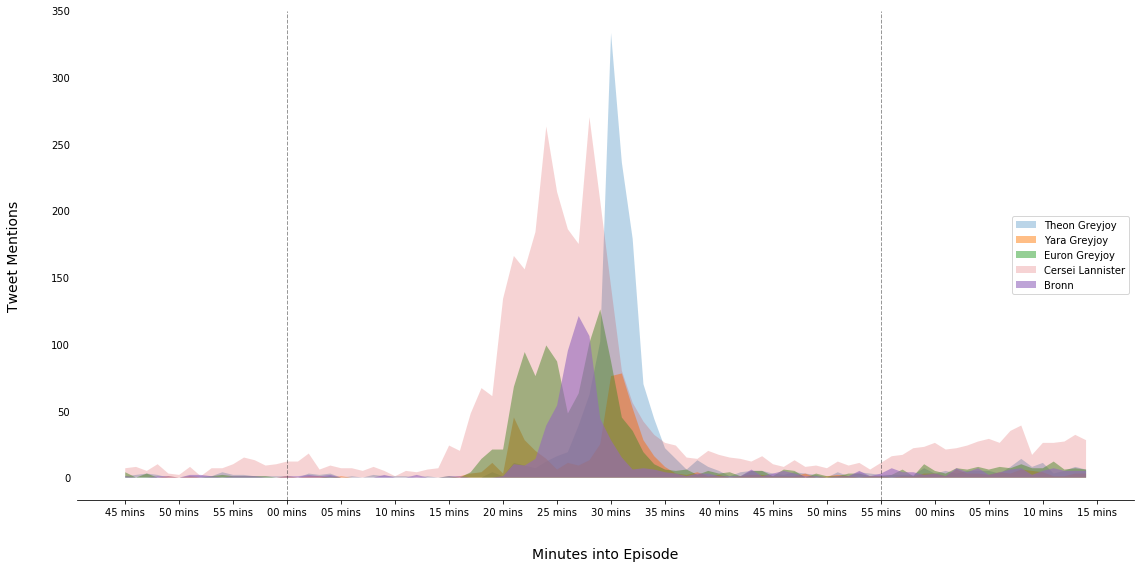

In [35]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.fill_between(show_text_main_minute.index, show_text_main_minute['theon_count'], alpha=0.3, label='Theon Greyjoy')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['yara_count'], alpha=0.5, label='Yara Greyjoy')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['euron_count'], alpha=0.5, label='Euron Greyjoy')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['cersei_count'], alpha=0.2, label='Cersei Lannister')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['bronn_count'], alpha=0.6, label='Bronn')


ax.grid(False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom=True, top=False, labelbottom=True, left=False, right=False, labelleft=True)

ax.axvline(x='2019-04-15 01:00', linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)
ax.axvline(x='2019-04-15 01:55', linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)

ax.set_xlabel("Minutes into Episode", labelpad=30, weight='normal', size=14)
ax.set_ylabel("Tweet Mentions", labelpad=30, weight='normal', size=14)

ax.tick_params(axis='x', rotation=0)

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MinuteLocator([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M mins'))

ax.legend(loc='center right')
# ax.set_title('GOT Character Twitter Buzz', pad=25, weight='normal', size=24)

plt.savefig('images/03_cersei.png', dpi=300)
plt.tight_layout()
plt.show()

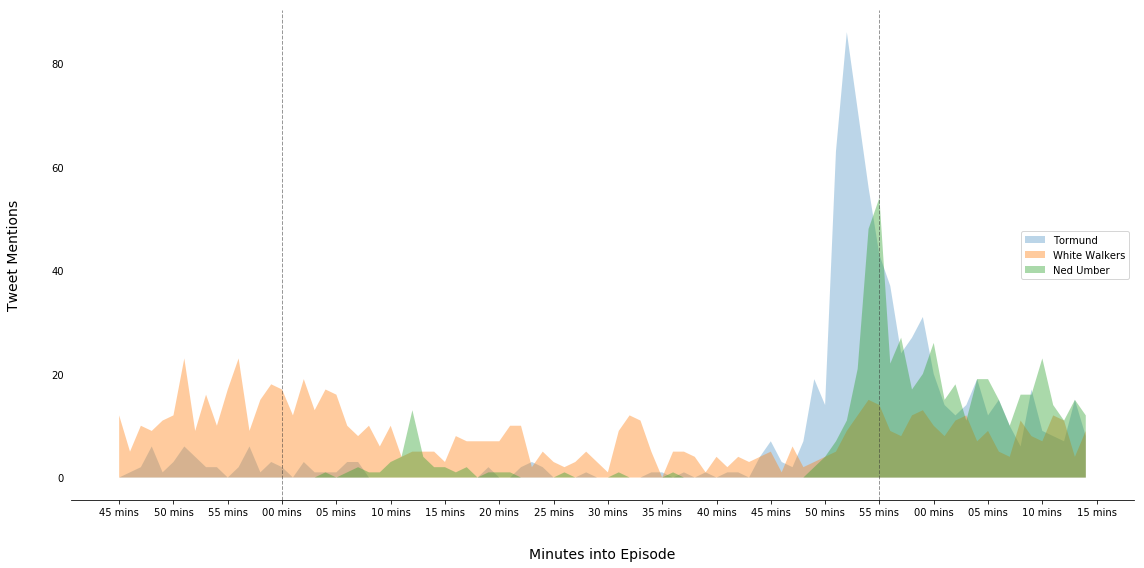

In [36]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.fill_between(show_text_main_minute.index, show_text_main_minute['tormund_count'], alpha=0.3, label='Tormund')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['whitewalker_count'], alpha=0.4, label='White Walkers')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['umber_count'], alpha=0.4, label='Ned Umber')


ax.grid(False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom=True, top=False, labelbottom=True, left=False, right=False, labelleft=True)

ax.axvline(x='2019-04-15 01:00', linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)
ax.axvline(x='2019-04-15 01:55', linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)

ax.set_xlabel("Minutes into Episode", labelpad=30, weight='normal', size=14)
ax.set_ylabel("Tweet Mentions", labelpad=30, weight='normal', size=14)

ax.tick_params(axis='x', rotation=0)

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MinuteLocator([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M mins'))

ax.legend(loc='center right')
# ax.set_title('GOT Character Twitter Buzz', pad=25, weight='normal', size=24)

plt.savefig('images/04_walkers.png', dpi=300)
plt.tight_layout()
plt.show()

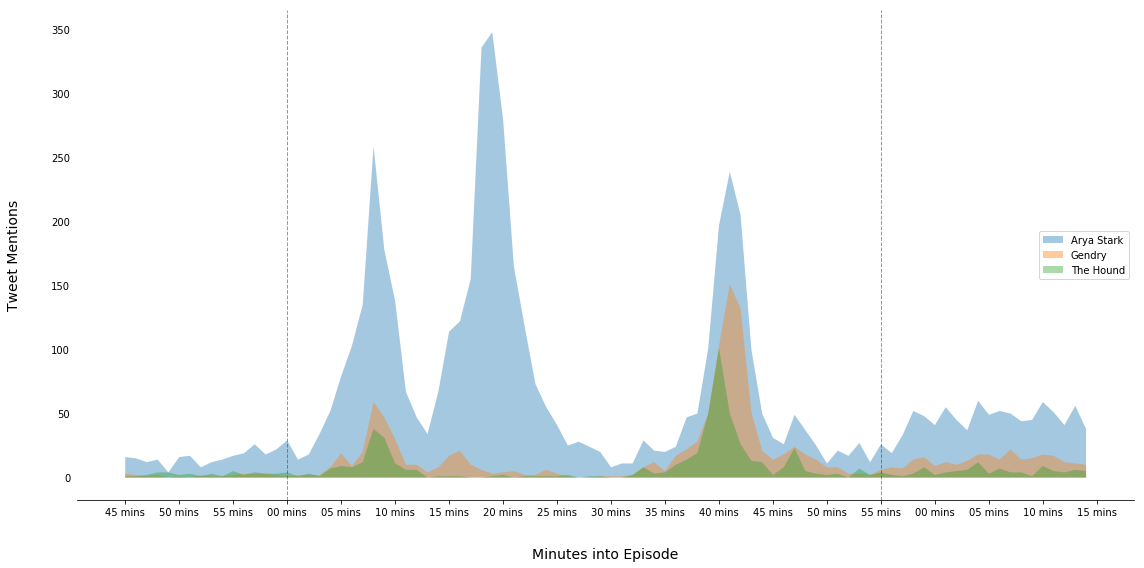

In [37]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.fill_between(show_text_main_minute.index, show_text_main_minute['arya_count'], alpha=0.4, label='Arya Stark')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['gendry_count'], alpha=0.4, label='Gendry')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['hound_count'], alpha=0.4, label='The Hound')

ax.grid(False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom=True, top=False, labelbottom=True, left=False, right=False, labelleft=True)

ax.axvline(x='2019-04-15 01:00', linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)
ax.axvline(x='2019-04-15 01:55', linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)

ax.set_xlabel("Minutes into Episode", labelpad=30, weight='normal', size=14)
ax.set_ylabel("Tweet Mentions", labelpad=30, weight='normal', size=14)

ax.tick_params(axis='x', rotation=0)

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MinuteLocator([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M mins'))

ax.legend(loc='center right')
# ax.set_title('GOT Character Twitter Buzz', pad=25, weight='normal', size=24)

plt.savefig('images/05_arya.png', dpi=300)
plt.tight_layout()
plt.show()